#### İlk olarak API'yi url değişkenine atadım, ardından request kütüphanesinin GET metodunu kullanıp datayı okudum. Ancak daha json formatında olduğı için json kütüphanesi ile doğru formata getirip, okunan dosya içerisinden sadece ilgili kısmı aldım. Ardından enlem, boylam ve durak ismi içermeyen bütün gereksiz sütunları çıkarttım. Daha sonra Basemap kütüphanesini kullanarak istanbulun bir grafiğini oluşturmaya çalıştım ancak *TypeError: 'module' object is not callable* hatası ile karşılaştım ve henüz çözemedim. Bu sebeple durakların yerlerini folium kütüphanesi ile çizdirdim. Bununla beraber durakların kullanım yoğunluğu datasını sitede bulamadım. Bu sebeple yoğunlukları göz ardı ettim.

##### ***"TypeError: 'module' object is not callable" hatasını çözdüm. Eksik package ve kütüphaneyi yanlış çağırmam sebebiyle aldığım bir hataymış. Folium çizimini kaldırarak Basemap ile çizilmiş halini bıraktım. 

In [1]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import requests
import json
import pandas as pd
import numpy as np
#from folium import plugins
#import folium

In [22]:
url = "https://data.ibb.gov.tr/api/3/action/datastore_search?resource_id=d1f7c258-bbc1-406f-9ab2-7a7c1797c673&limit=6441"
payload = {}
headers= {}


response = requests.request("GET", url, headers=headers, data = payload)

result = json.loads(response.text)

records = result["result"]["records"]
veriseti = pd.DataFrame(data = records)
df = veriseti.drop(veriseti.columns[[0,1,2,4,7,8,9,10,11,12]], axis=1)
df['stop_lat'] = pd.to_numeric(df['stop_lat'])
df['stop_lon'] = pd.to_numeric(df['stop_lon'])

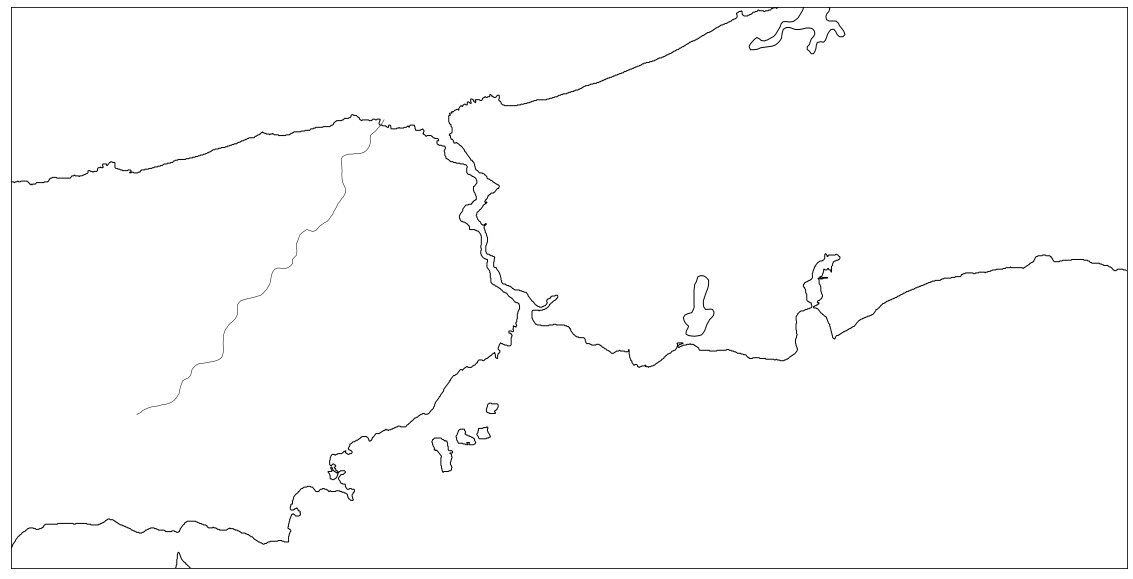

In [40]:
m = Basemap(projection='merc',
           llcrnrlat=40.725,
           urcrnrlat=41.353,
           llcrnrlon=29.760,
           urcrnrlon=28.105,
           resolution='f')

fig = plt.figure(figsize=(20,12))

m.drawcoastlines()
m.drawcountries(color='gray')
m.drawrivers()
plt.show()

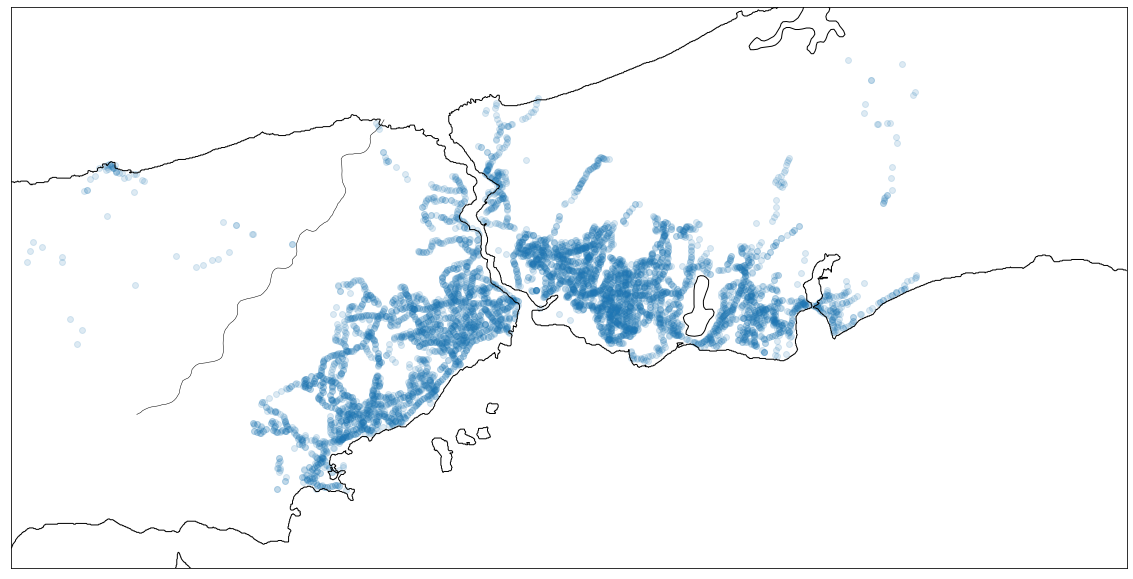

In [41]:
lon = np.array(df['stop_lon'])
lat = np.array(df['stop_lat'])
x,y = m(lon,lat)


fig = plt.figure(figsize=(20,12))

m.drawcoastlines()
m.drawcountries(color='gray')
m.drawrivers()
m.scatter(x,y, cmap='jet',alpha = 0.15)
plt.show()